# Scratchpad

In [1]:
import pandas as pd

# Always display all columns (no matter how many there are)
pd.set_option('display.max_columns', None)

from plotnine import *

/Users/owner/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


> SideQuest 🤖 -- Learning R (and ggplot)
>
> If you're already comfortable with Python and would prefer to try playing the class in "hard mode", you're welcome to give learning ggplot in R a shot! If you'd like to take on this SideQuest, check out [this notebook](https://nbviewer.org/github/dmil/jupyter-quickstart/blob/master/notebook.ipynb) which will help you to set up Jupyter notebooks where you can easily switch between R and Python! You can submit this assignment one of those notebooks if you prefer.



## Load Data

Documentation:
- https://github.com/fivethirtyeight/data/tree/master/pollster-ratings

We will be looking at `raw-polls.csv`

In [2]:
# read raw_polls.csv from FiveThirtyEighta
raw_polls_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/pollster-ratings/raw-polls.csv'
polls = pd.read_csv(raw_polls_url, parse_dates=['electiondate', 'polldate'])

# saves a copy of this CSV onto your computer
polls.to_csv('raw_polls.csv', index=False) 

# add a column to separate national polls from state level polls
polls['national'] = polls['location'].apply(lambda x: True if x=='US' else False)

# add a column that counts the days until the election
polls['days_until_election'] = polls['electiondate'] - polls['polldate']

# show the first 2 rows of the data frame
polls.head(2)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,advancedplusminus,comment,national,days_until_election
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,Live Phone,NaN,1998-10-13,364.0,Peter Vallone,13080,DEM,26.0,George Pataki,13083,REP,57.0,9.0,-31.0,1998-11-03,33.16,54.32,-21.15,9.85,-9.85,1.0,1.461561,for New York Daily News | WABC-TV (New York),False,21 days
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,Live Phone,NaN,1998-10-13,540.0,Lee Fisher,13085,DEM,37.0,Bob Taft,13086,REP,52.0,NaN,-15.0,1998-11-03,44.69,50.05,-5.36,9.64,-9.64,1.0,4.285789,NaN,False,21 days


## Exploratory analysis

In [3]:
pres_g = polls.query('type_simple == "Pres-G"')

In [4]:
pres_g_state = pres_g.query('national == False')

In [5]:
pres_g_state

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,advancedplusminus,comment,national,days_until_election
471,6483,7952,815,2000,2000_Pres-G_FL,FL,Pres-G,Pres-G,McLaughlin & Associates,203,Live Phone,R,2000-10-17,600.0,Al Gore,222,DEM,43.0,George W. Bush,241,REP,44.0,3.0,-1.0,2000-11-07,48.84,48.85,-0.01,0.99,-0.99,1.0,-3.534693,for Bill McCollum,False,21 days
472,6470,7939,820,2000,2000_Pres-G_IL,IL,Pres-G,Pres-G,KRC Research,160,Live Phone,NaN,2000-10-17,600.0,Al Gore,222,DEM,45.0,George W. Bush,241,REP,43.0,4.0,2.0,2000-11-07,54.60,42.58,12.01,10.01,-10.01,1.0,3.420487,NaN,False,21 days
473,6473,7942,820,2000,2000_Pres-G_IL,IL,Pres-G,Pres-G,Research 2000,281,Live Phone,NaN,2000-10-17,601.0,Al Gore,222,DEM,47.0,George W. Bush,241,REP,40.0,3.0,7.0,2000-11-07,54.60,42.58,12.01,5.01,-5.01,1.0,-1.918393,NaN,False,21 days
474,6474,7943,836,2000,2000_Pres-G_NH,NH,Pres-G,Pres-G,Research 2000,281,Live Phone,NaN,2000-10-17,603.0,Al Gore,222,DEM,44.0,George W. Bush,241,REP,41.0,1.0,3.0,2000-11-07,46.80,48.07,-1.27,4.27,4.27,0.0,-1.067767,NaN,False,21 days
475,6472,7941,844,2000,2000_Pres-G_PA,PA,Pres-G,Pres-G,Lincoln Institute,170,Live Phone,NaN,2000-10-17,728.0,Al Gore,222,DEM,42.0,George W. Bush,241,REP,42.0,4.0,0.0,2000-11-07,50.61,46.44,4.17,4.17,-4.17,0.5,-0.281045,NaN,False,21 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10722,72630,136294,6259,2020,2020_Pres-G_WI,WI,Pres-G,Pres-G,Research Co.,449,Online,NaN,2020-11-01,450.0,Joseph R. Biden Jr.,13256,DEM,50.0,Donald Trump,13254,REP,42.0,NaN,8.0,2020-11-03,49.45,48.82,0.63,7.37,7.37,1.0,1.066165,NaN,False,2 days
10736,72754,136533,8718,2020,2020_Pres-G_N2,N2,Pres-G,Pres-G,"University of Nevada, Las Vegas Lee Business S...",609,Online,NaN,2020-11-01,191.0,Joseph R. Biden Jr.,13256,DEM,50.2,Donald Trump,13254,REP,44.3,5.4,5.9,2020-11-03,51.95,45.45,6.50,0.60,-0.60,1.0,-4.877900,NaN,False,2 days
10738,72722,136491,6220,2020,2020_Pres-G_FL,FL,Pres-G,Pres-G,Opinion Savvy/InsiderAdvantage,243,IVR/Live Phone,NaN,2020-11-02,400.0,Joseph R. Biden Jr.,13256,DEM,47.0,Donald Trump,13254,REP,48.2,1.6,-1.2,2020-11-03,47.86,51.22,-3.36,2.16,2.16,1.0,-3.481266,for FOX35 Orlando,False,1 days
10739,72621,136283,6223,2020,2020_Pres-G_IA,IA,Pres-G,Pres-G,Public Policy Polling,263,IVR/Text,NaN,2020-11-02,871.0,Joseph R. Biden Jr.,13256,DEM,49.0,Donald Trump,13254,REP,48.0,NaN,1.0,2020-11-03,44.89,53.09,-8.20,9.20,9.20,0.0,2.738601,among 'voters',False,1 days


In [6]:
# average polling error for each year, state-level Pres-G
pres_g_state.groupby(['year','pollster']).error.mean().to_frame().reset_index()

,year,pollster,error
0,2000,ABC News/The Washington Post,4.040000
1,2000,American Research Group,4.185455
2,2000,Arizona State University,3.710000
3,2000,Blum & Weprin Associates,2.313333
4,2000,Brown University,11.080000
...,...,...,...
508,2020,Wick,2.486667
509,2020,Y2 Analytics,8.085000
510,2020,YouGov,4.344375
511,2020,Zia Poll,6.780000


<AxesSubplot:xlabel='year'>

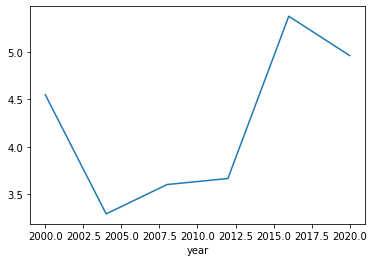

In [7]:
pres_g_state.groupby('year').error.mean().plot()

In [8]:
mean_type_state = polls.groupby(['year','type_simple']).error.mean().to_frame().reset_index()

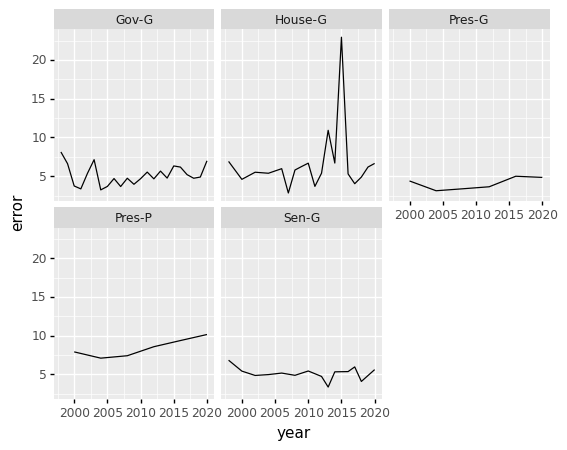

<ggplot: (378665942)>

In [9]:
( 
    ggplot(mean_type_state,
           aes('year', 'error'))
        + geom_line()
        + facet_wrap('type_simple')
)

In [10]:
mean_type_national = polls.groupby(['year','type_simple','national']).error.mean().to_frame().reset_index()

In [11]:
mean_arg_national = polls.query('pollster == "American Research Group"').groupby(["year","type_simple","national"]).error.mean().to_frame().reset_index()

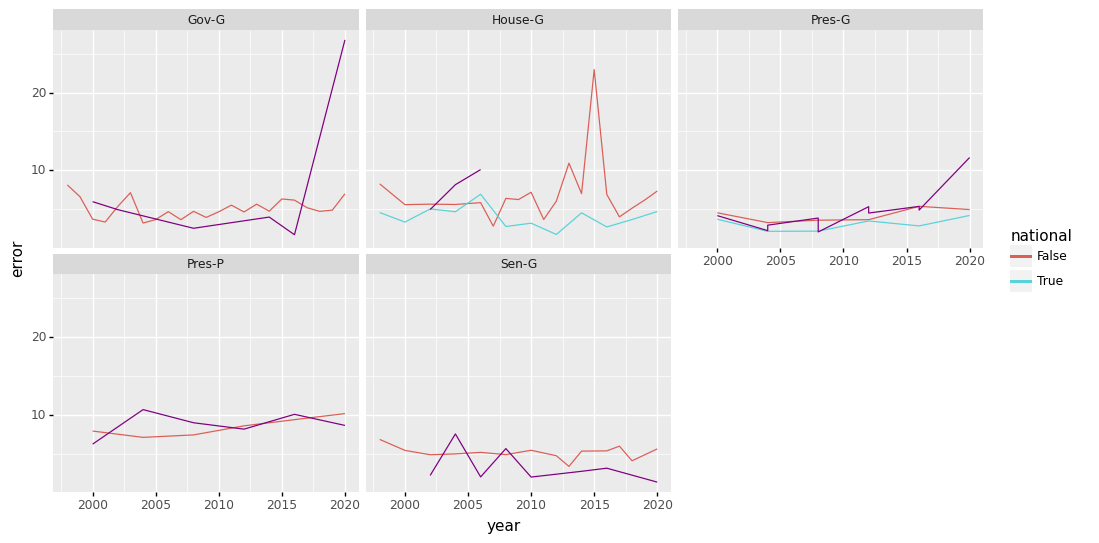

<ggplot: (378963264)>

In [12]:
( 
    ggplot(
           aes('year', 'error', color='national'))
        + geom_line(mean_type_national)
        + geom_line(mean_arg_national, color='purple')
        + facet_wrap('type_simple')
        + theme(figure_size=(12,6))

)

In [13]:
mean_fox_national = polls.query('pollster == "Fox News/Beacon Research/Shaw & Co. Research"').groupby(["year","type_simple","national"]).error.mean().to_frame().reset_index()



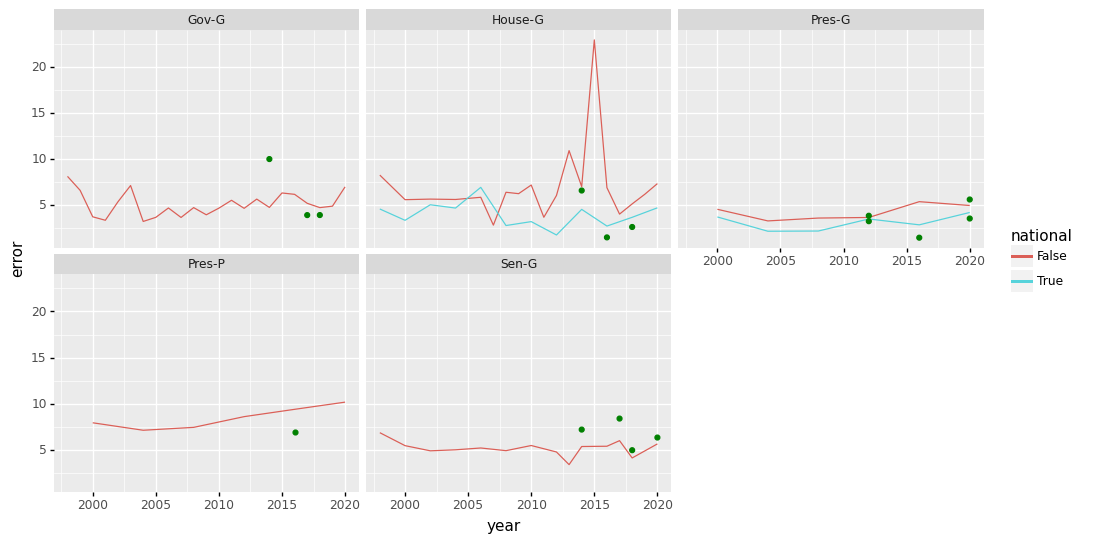

<ggplot: (379094441)>

In [14]:
( 
    ggplot(
           aes('year', 'error', color='national'))
        + geom_line(mean_type_national)
        + geom_point(mean_fox_national, color='green')
        + facet_wrap('type_simple')
        + theme(figure_size=(12,6))

)

In [15]:
polls[polls.pollster == "Fox News/Beacon Research/Shaw & Co. Research"].groupby("year").type_simple.value_counts()

year  type_simple
2012  Pres-G          4
2014  Gov-G           3
      Sen-G           3
      House-G         1
2016  Pres-P         14
      Pres-G          3
      House-G         2
2017  Gov-G           1
      Sen-G           1
2018  Sen-G           5
      Gov-G           2
      House-G         1
2020  Pres-G          5
      Sen-G           1
Name: type_simple, dtype: int64